# Importing and Cleaning Data

## Importing Packages

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import xgboost as xgb
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,\
auc,recall_score,precision_score,roc_curve,accuracy_score,precision_recall_curve, r2_score, mean_squared_error
import time

## Importing Data

In [5]:
housing = pd.read_csv("data/NY-House-Dataset.csv")
housing.columns = housing.columns.str.lower() #lower the casing of columns for ease of use
housing.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

## Data Inspection and Exploration

In [6]:
housing.head()

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [7]:
#Checking for null values
print(housing.info())
housing['sublocality'] = housing['sublocality'].astype('category')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brokertitle                  4801 non-null   object 
 1   type                         4801 non-null   object 
 2   price                        4801 non-null   int64  
 3   beds                         4801 non-null   int64  
 4   bath                         4801 non-null   float64
 5   propertysqft                 4801 non-null   float64
 6   address                      4801 non-null   object 
 7   state                        4801 non-null   object 
 8   main_address                 4801 non-null   object 
 9   administrative_area_level_2  4801 non-null   object 
 10  locality                     4801 non-null   object 
 11  sublocality                  4801 non-null   object 
 12  street_name                  4801 non-null   object 
 13  long_name         

## Looking into Outliers

In [8]:
housing.sublocality.value_counts()

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        1
Fort Hamilton          1
East Bronx             1
Dumbo                  1
Rego Park              1
Brooklyn Heights       1
Snyder Avenue          1
Name: count, dtype: int64

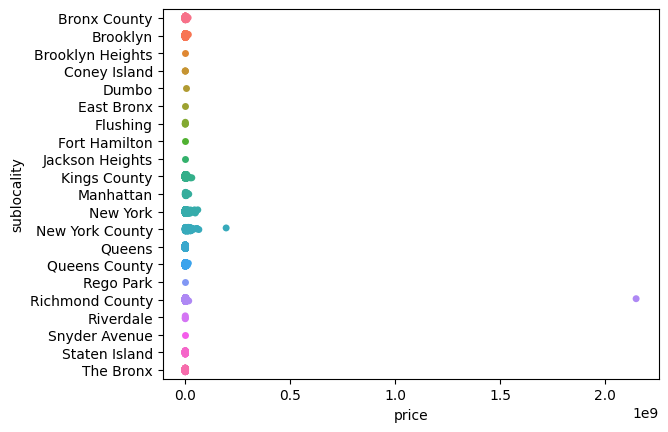

In [9]:
#Checking for outliers
sns.stripplot(data = housing,
             x= "price",
             y = "sublocality",
             hue = 'sublocality',
             legend = False)
plt.show()

Noticing a major outlier in Richmond County, we will investigate it.

In [10]:
housing[housing["price"] ==housing.loc[housing["sublocality"] == "Richmond County", "price"].max()]

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
304,Brokered by ANNE LOPA REAL ESTATE,House for sale,2147483647,7,6.0,10000.0,6659-6675 Amboy Rd,"New York, NY 10309","6659-6675 Amboy RdNew York, NY 10309",United States,New York,Richmond County,Staten Island,Amboy Road,"6659 Amboy Rd, Staten Island, NY 10309, USA",40.518484,-74.224418


This value skews the data too much, and seems to be an above average sale. We will remove this, along with any other extreme outliers now.

In [11]:
sublocality_counts = housing['sublocality'].value_counts()
multiples = sublocality_counts[sublocality_counts > 1].index.tolist()
sublocalities_multiple = housing[housing["sublocality"].isin(multiples)]
print(sublocalities_multiple.sublocality.value_counts())

sublocality
New York            1016
Kings County         727
Queens County        684
Queens               555
Richmond County      480
Brooklyn             464
Bronx County         307
New York County      286
The Bronx            184
Staten Island         59
Manhattan             21
Flushing               4
Riverdale              4
Coney Island           3
Jackson Heights        0
Fort Hamilton          0
East Bronx             0
Dumbo                  0
Rego Park              0
Brooklyn Heights       0
Snyder Avenue          0
Name: count, dtype: int64


In [12]:
sublocalities_multiple.loc[:,"sublocality"]=sublocalities_multiple.loc[:,"sublocality"].cat.remove_unused_categories()
sublocalities_multiple.sublocality.value_counts()

sublocality
New York           1016
Kings County        727
Queens County       684
Queens              555
Richmond County     480
Brooklyn            464
Bronx County        307
New York County     286
The Bronx           184
Staten Island        59
Manhattan            21
Flushing              4
Riverdale             4
Coney Island          3
Name: count, dtype: int64

<Figure size 1400x800 with 0 Axes>

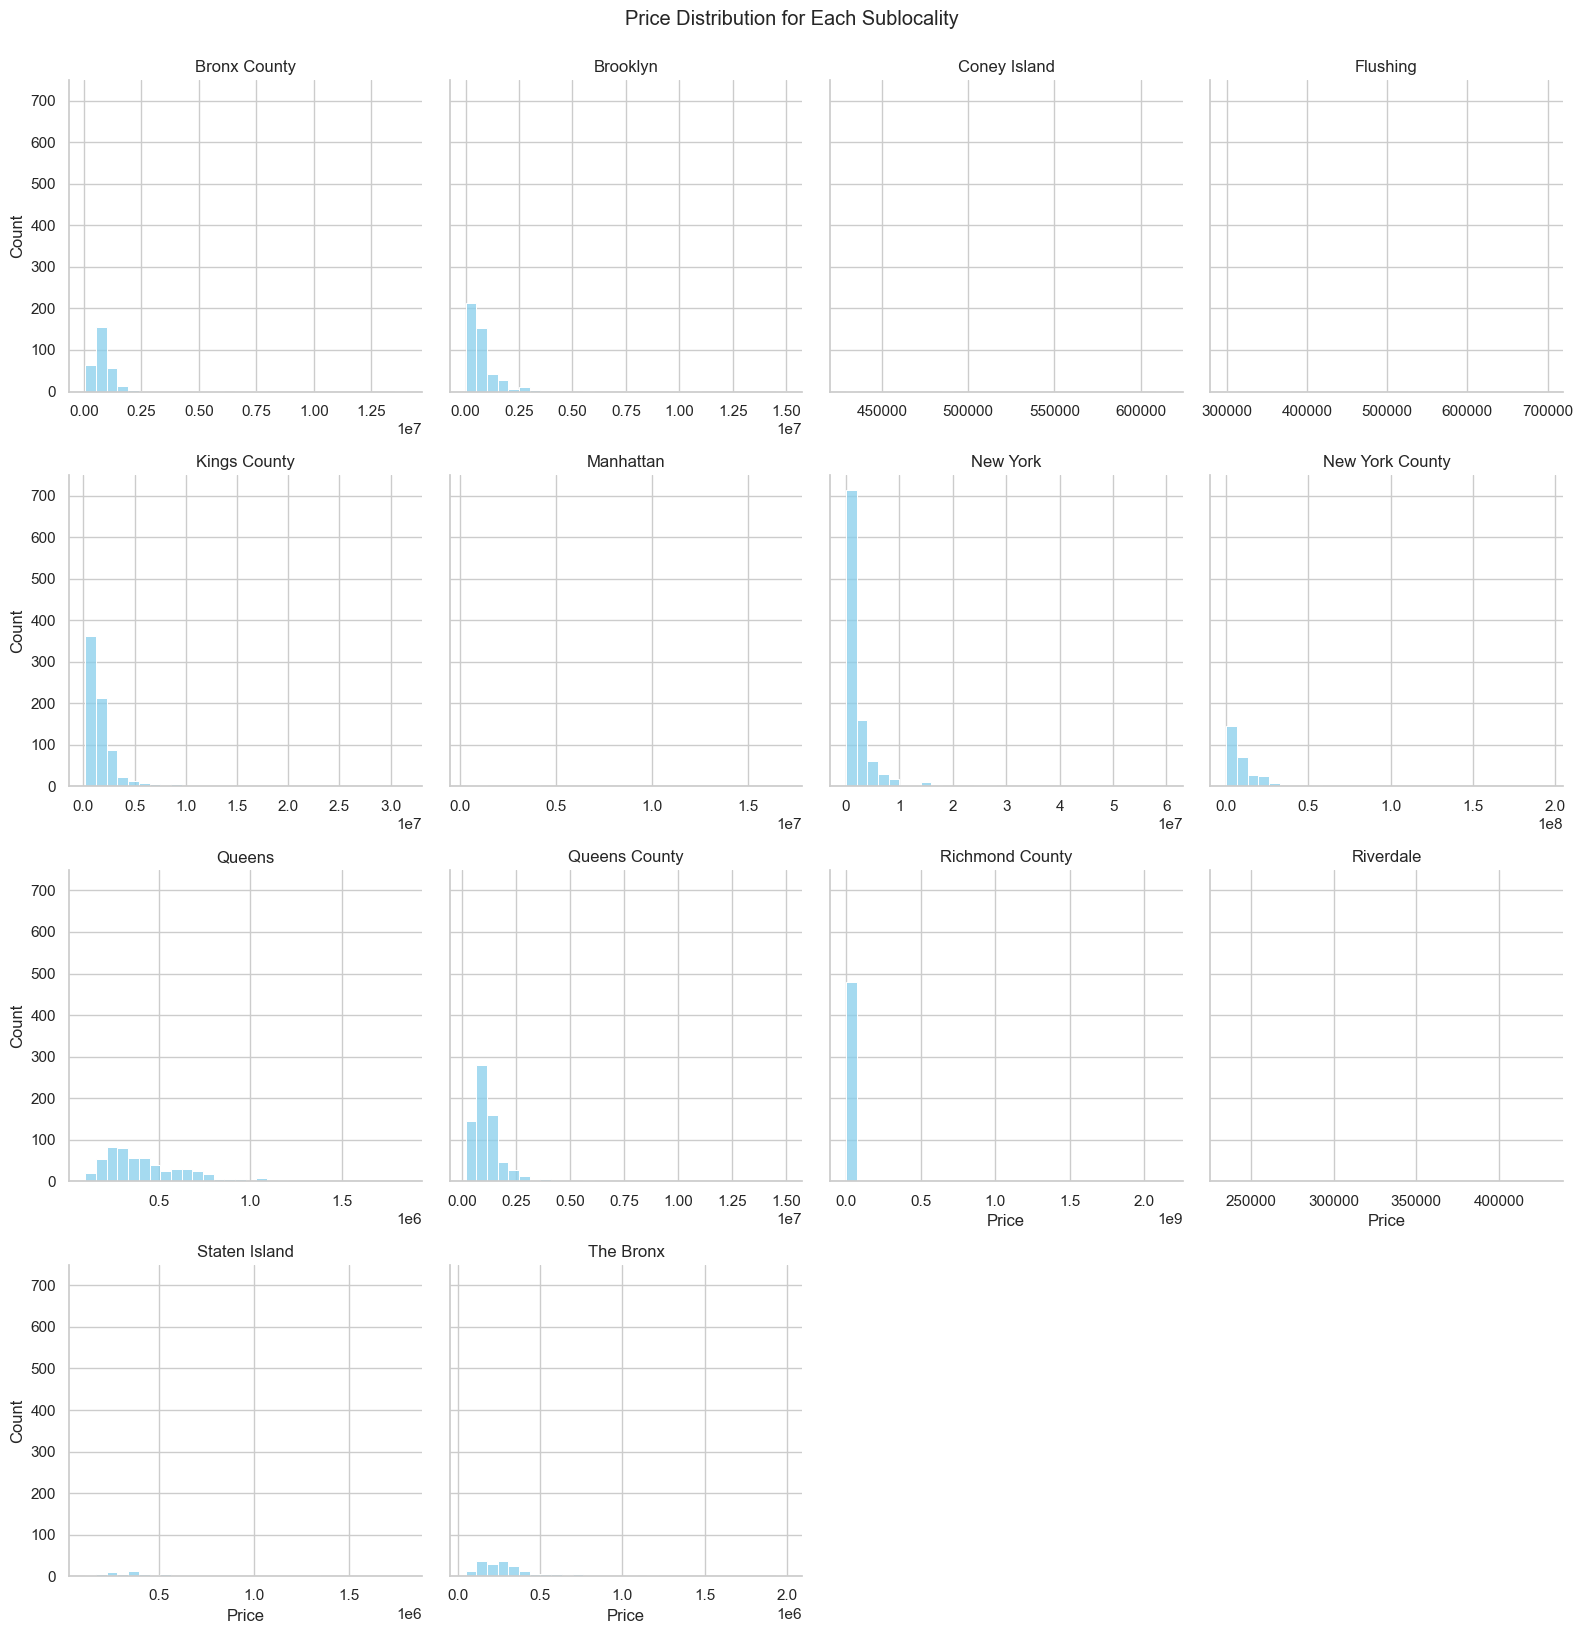

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each sublocality
g = sns.FacetGrid(sublocalities_multiple, col="sublocality", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "price", kde=False, bins=30, color='skyblue')

g.set_axis_labels("Price", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price Distribution for Each Sublocality", y=1.02)

plt.show()

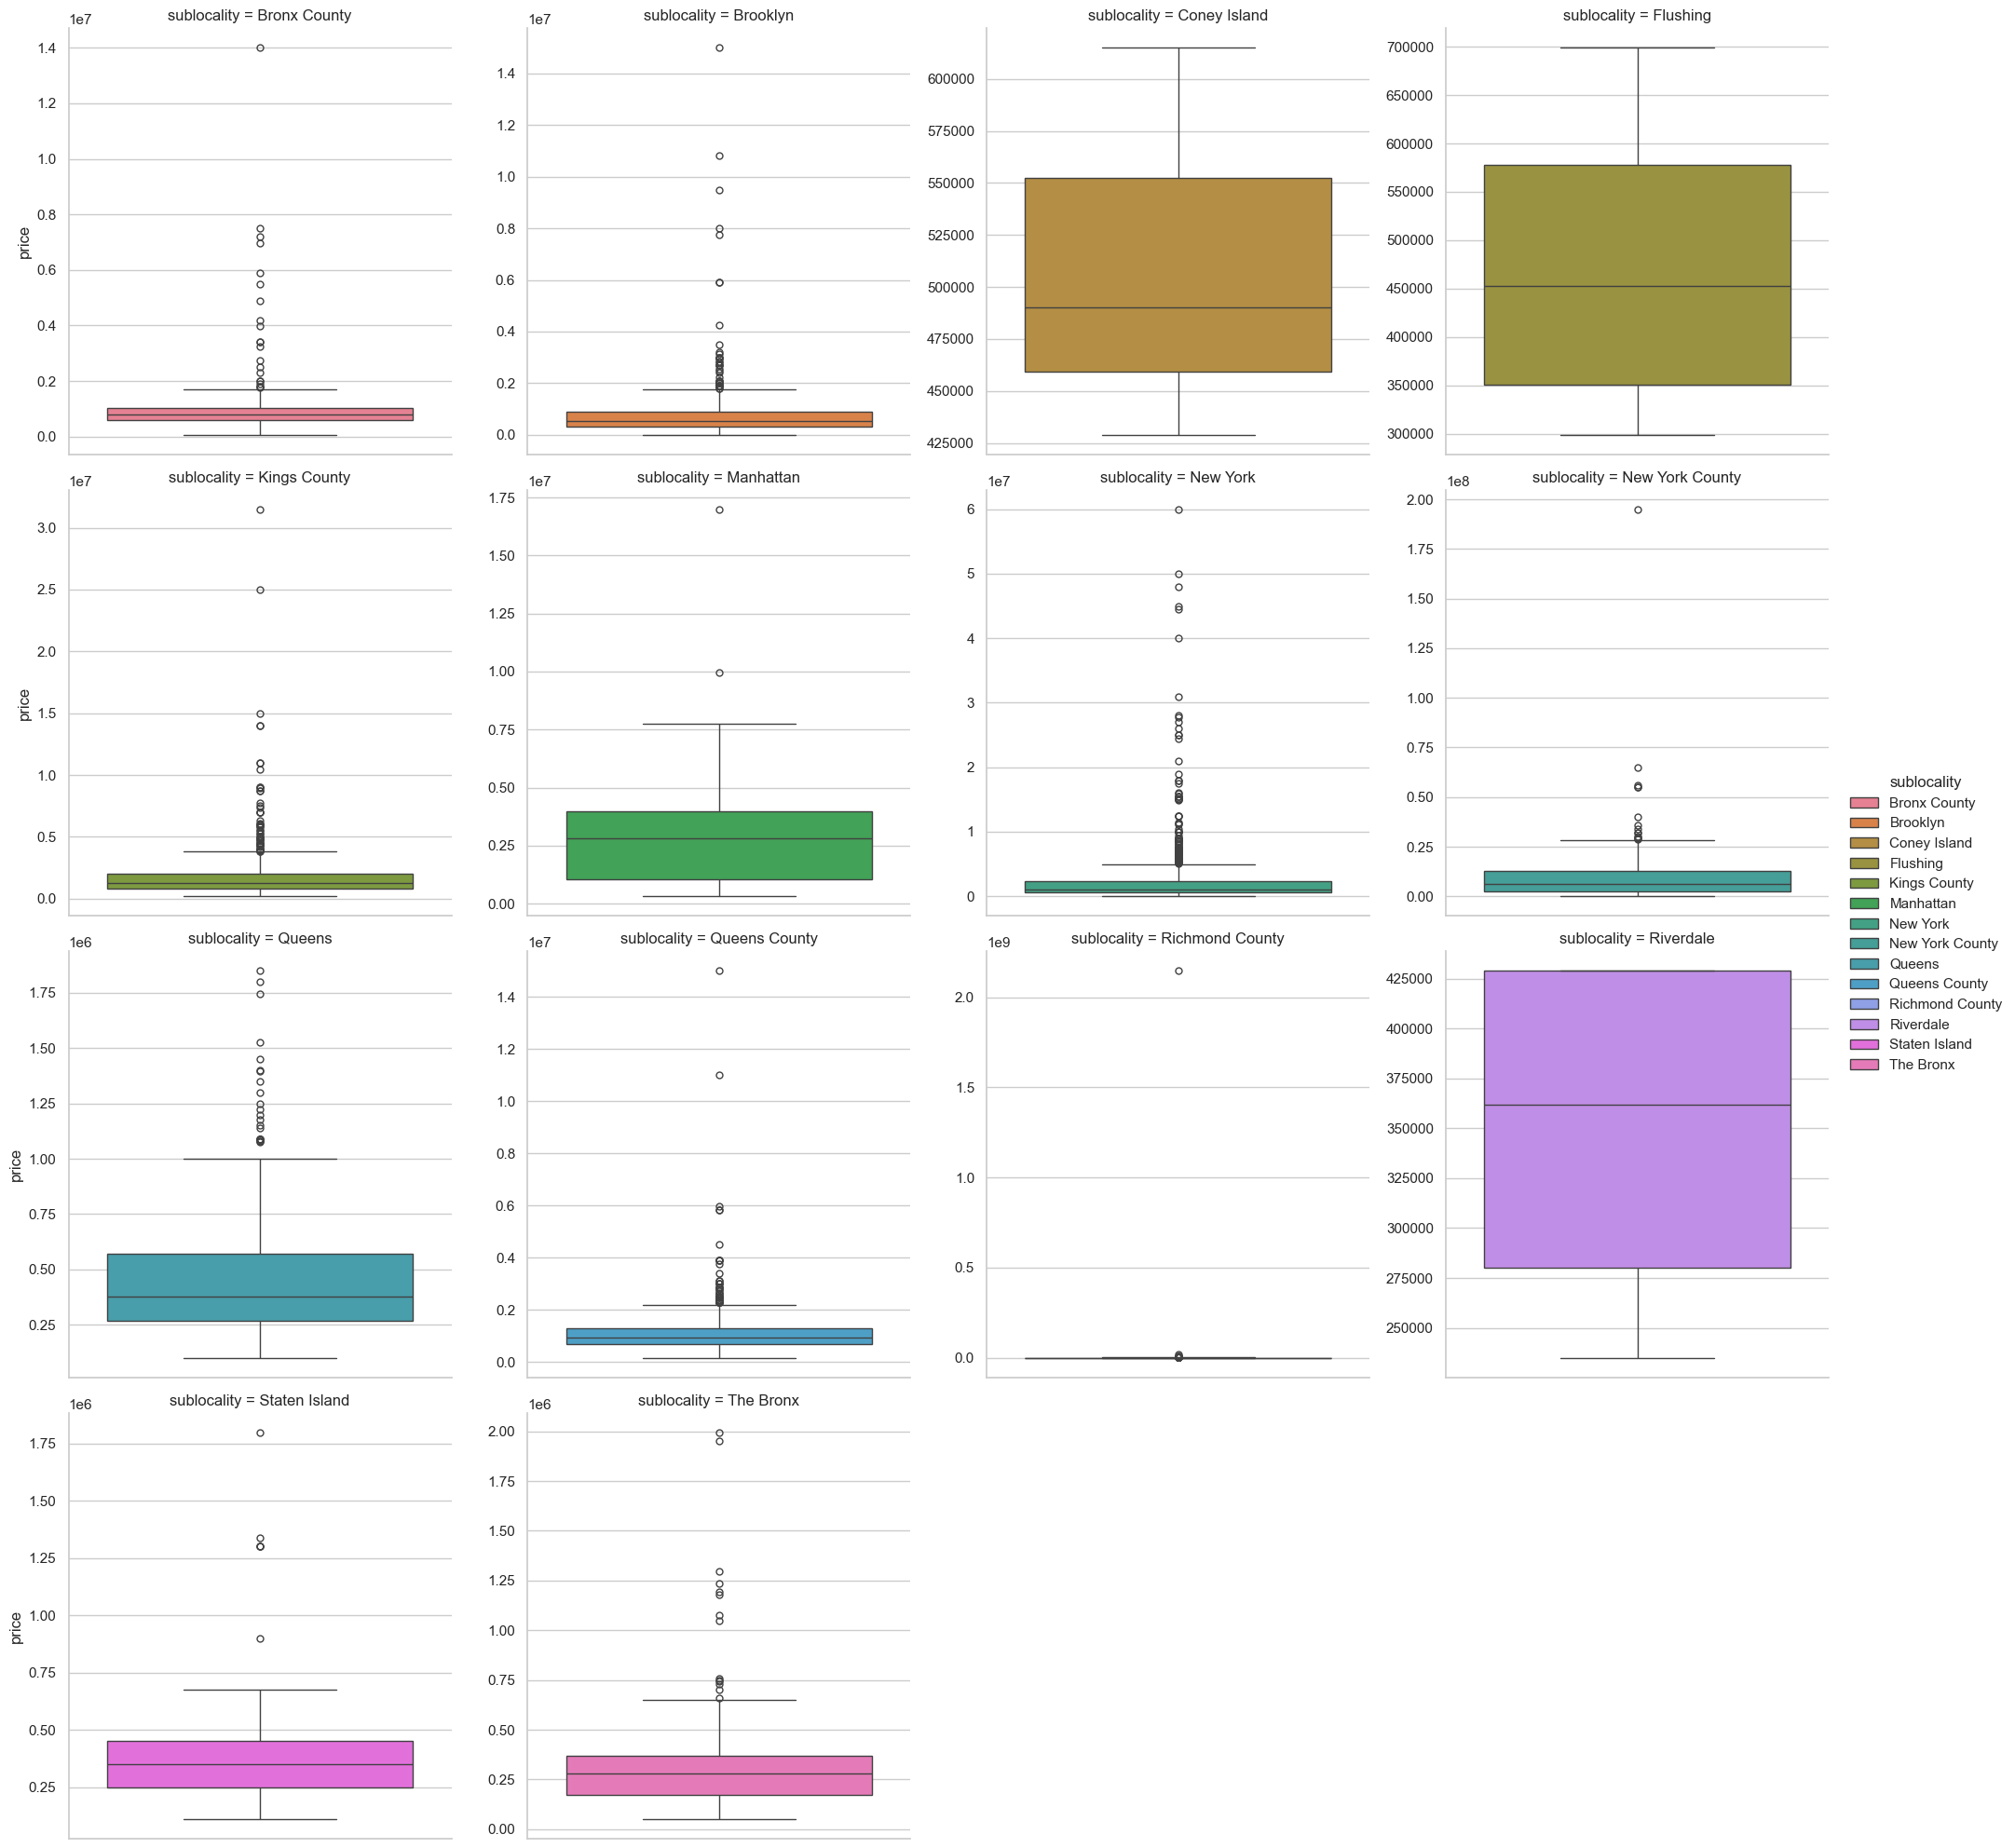

In [14]:
sns.catplot(data = sublocalities_multiple,
            y = "price", 
            kind = "box",
            col = 'sublocality',
            hue = 'sublocality',
           col_wrap =4,
           sharey=False)

plt.show()

We will remove outliers, but only extreme outliers as to not affect the data too much.

In [15]:
def find_outliers(group):
    q1 = group['price'].quantile(0.25)
    q3 = group['price'].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
     
    return group[((group['price'] > upper_limit) | (group['price'] < lower_limit))]

outliers = housing.groupby('sublocality').apply(find_outliers)['address']
print(outliers)

housing_clean = housing[~housing["address"].isin(outliers)]
housing_clean

sublocality       
Bronx County  417                    2090 Arthur Ave
              513                 5041 Goodridge Ave
              823                    3650 Bronx Blvd
              1063                5020 Grosvenor Ave
              1068                6140 Delafield Ave
                                   ...              
The Bronx     3432     3777 Independence Ave Apt 16M
              3491               4 Marisa Ct Unit 4A
              3661       750 Kappock St Unit 611-614
              3899    4555 Henry Hudson Pkwy Apt 903
              4407          2500 Johnson Ave Apt 14H
Name: address, Length: 357, dtype: object


/var/folders/zy/5chfsfsd461fc9x38r61w2xr0000gn/T/ipykernel_33163/1149499743.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outliers = housing.groupby('sublocality').apply(find_outliers)['address']


,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075","222 E 80th St Apt 3AManhattan, NY 10075",New York,New York County,New York,Manhattan,222,"222 E 80th St #3a, New York, NY 10075, USA",40.774350,-73.955879
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374","97-40 62 Dr Unit LgRego Park, NY 11374",United States,New York,Queens County,Queens,62nd Drive,"97-40 62nd Dr, Rego Park, NY 11374, USA",40.732538,-73.860152
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011","427 W 21st St Unit GardenNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"427 W 21st St, New York, NY 10011, USA",40.745882,-74.003398
4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373","91-23 Corona Ave Unit 4GElmhurst, NY 11373",New York,Queens County,Queens,Flushing,91-23,"91-23 Corona Ave. #4b, Flushing, NY 11373, USA",40.742770,-73.872752


Now that we've removed outliers, we will recheck the spread of the data.

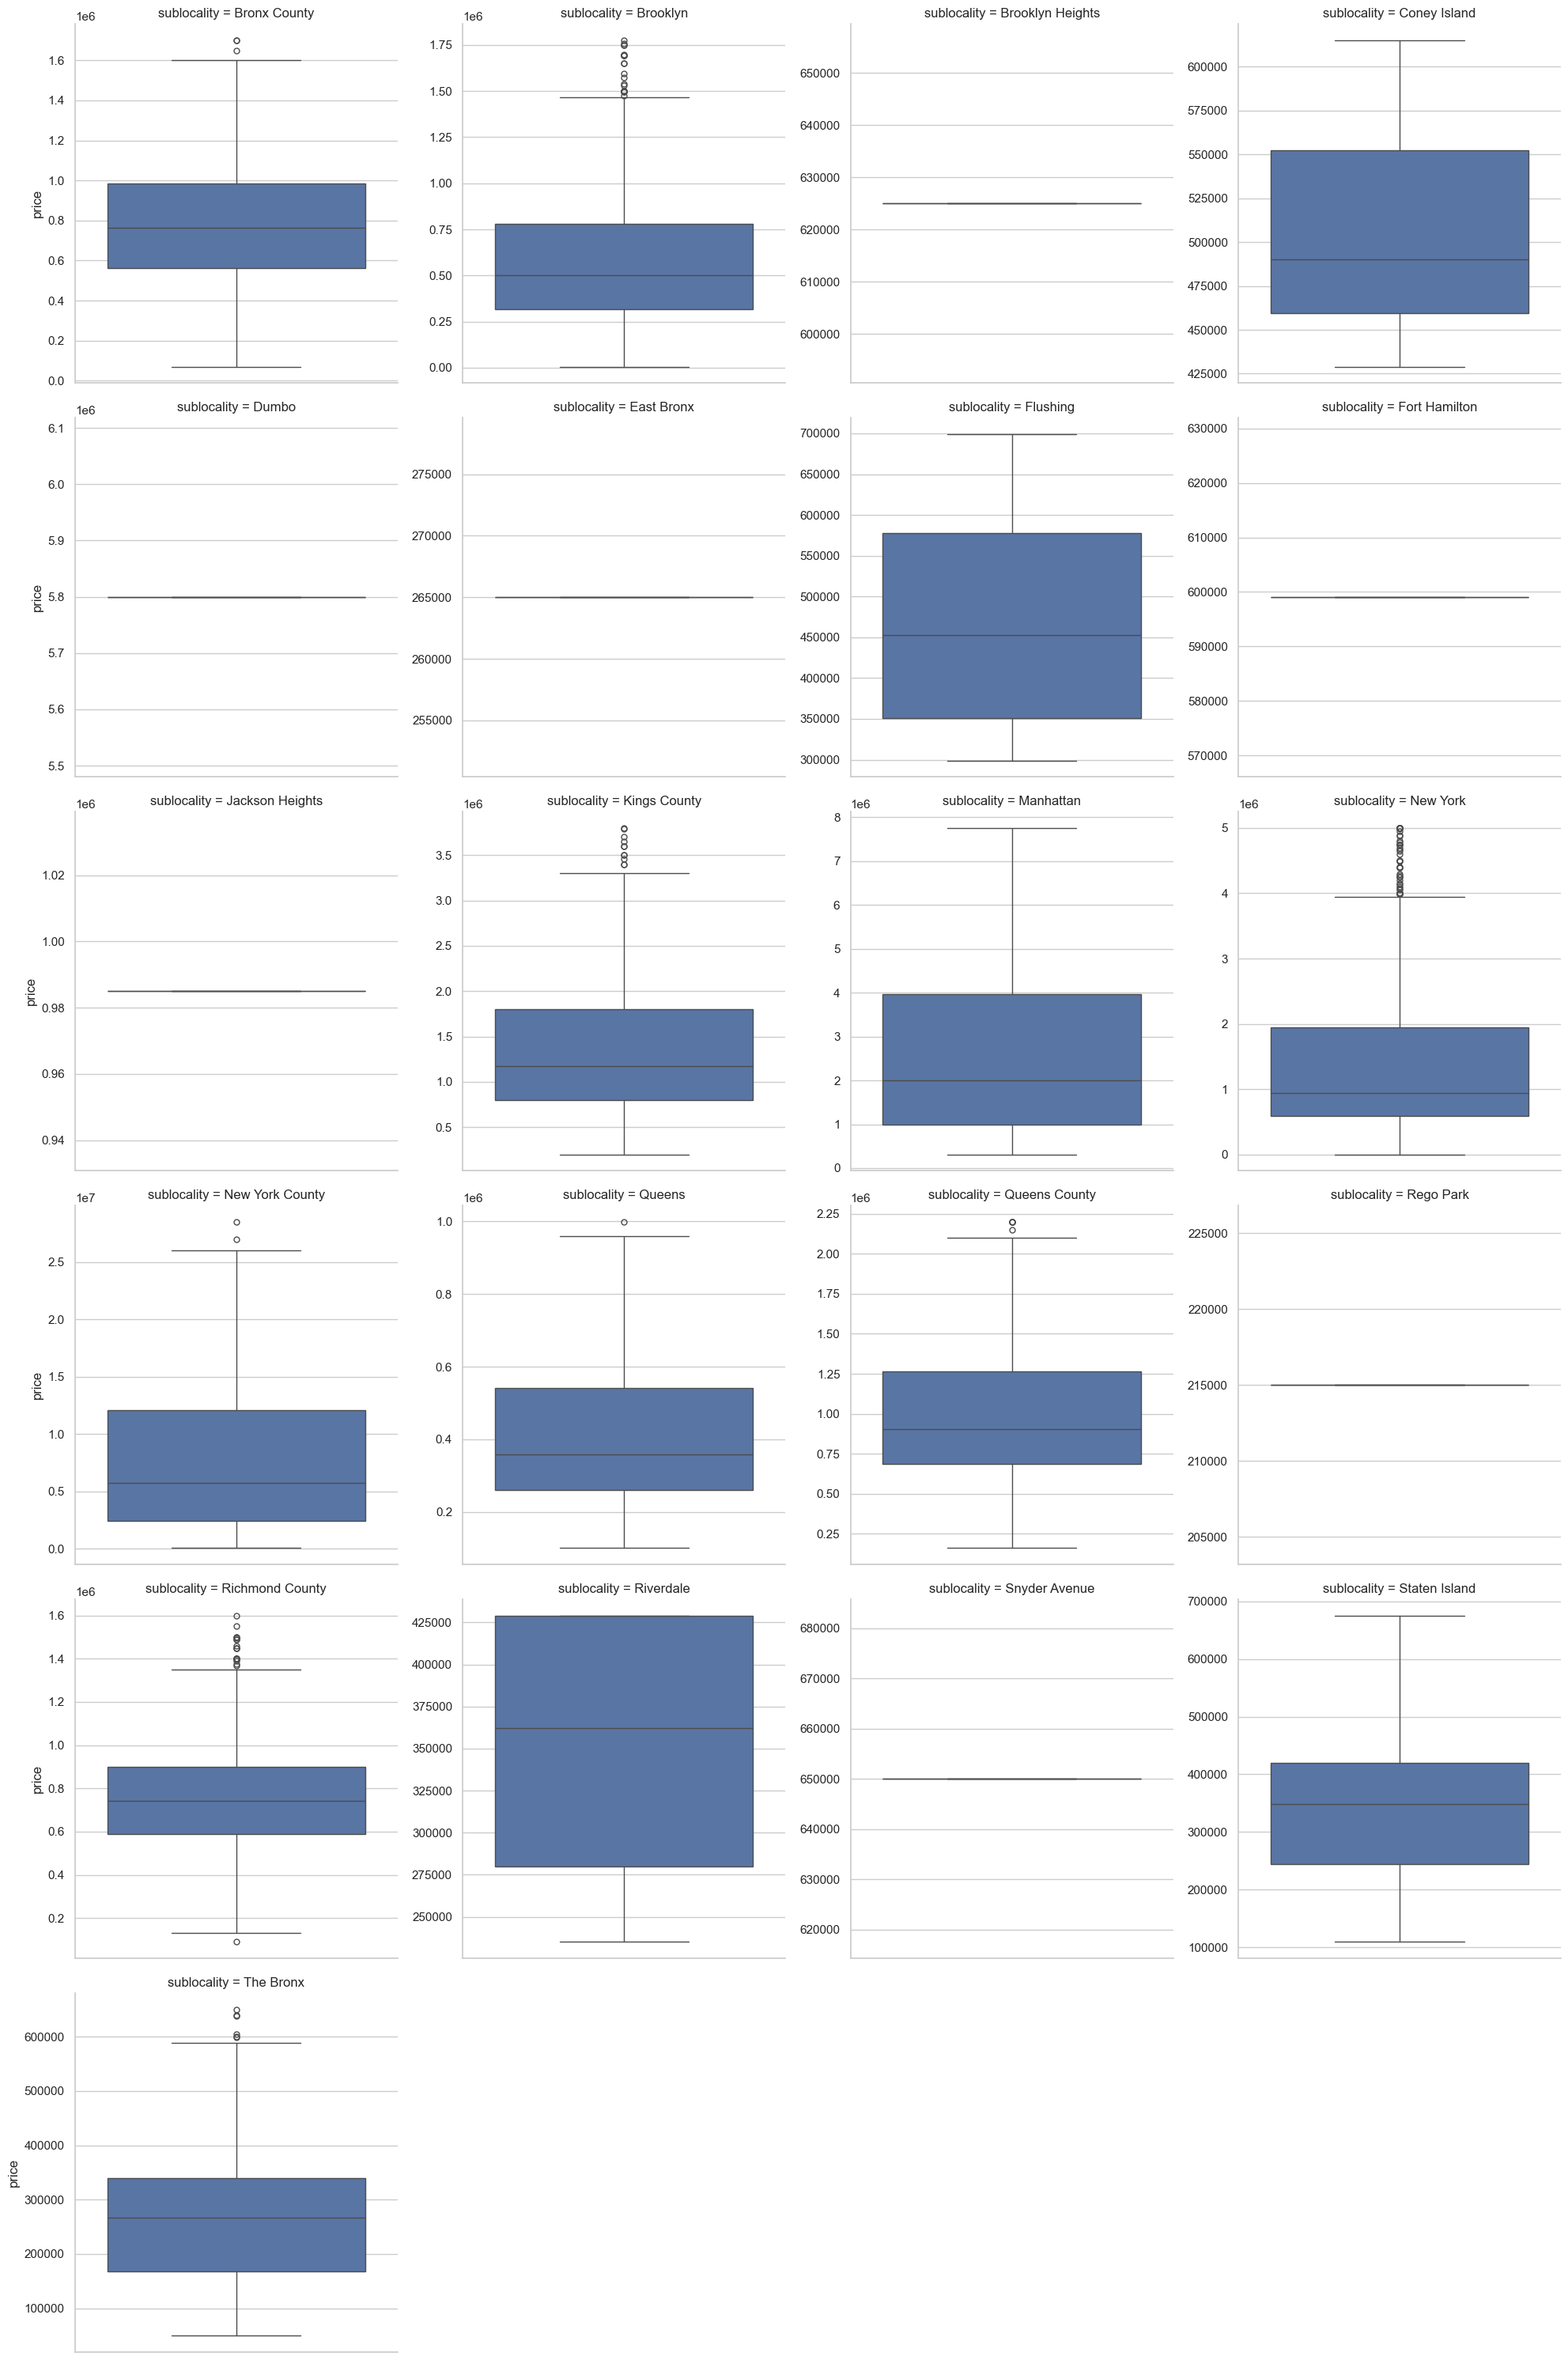

In [16]:
sns.catplot(data = housing_clean,
            y = "price", 
            kind = "box",
            col = 'sublocality',
           col_wrap =4,
           sharey=False)

plt.show()

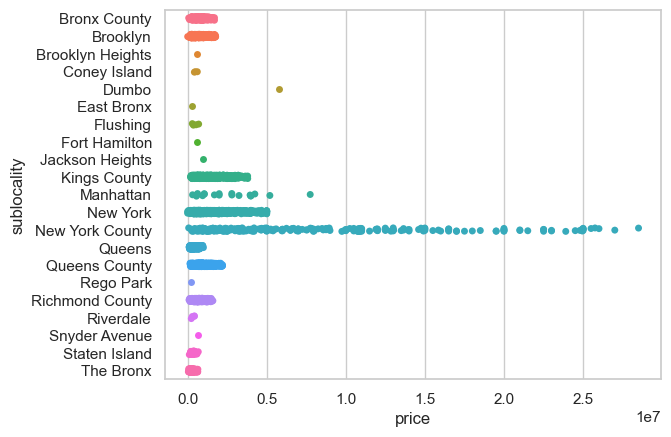

In [17]:
sns.stripplot(data = housing_clean,
             x= "price",
             y = "sublocality",
             hue = 'sublocality',
             legend = False)

plt.show()

<Figure size 1400x800 with 0 Axes>

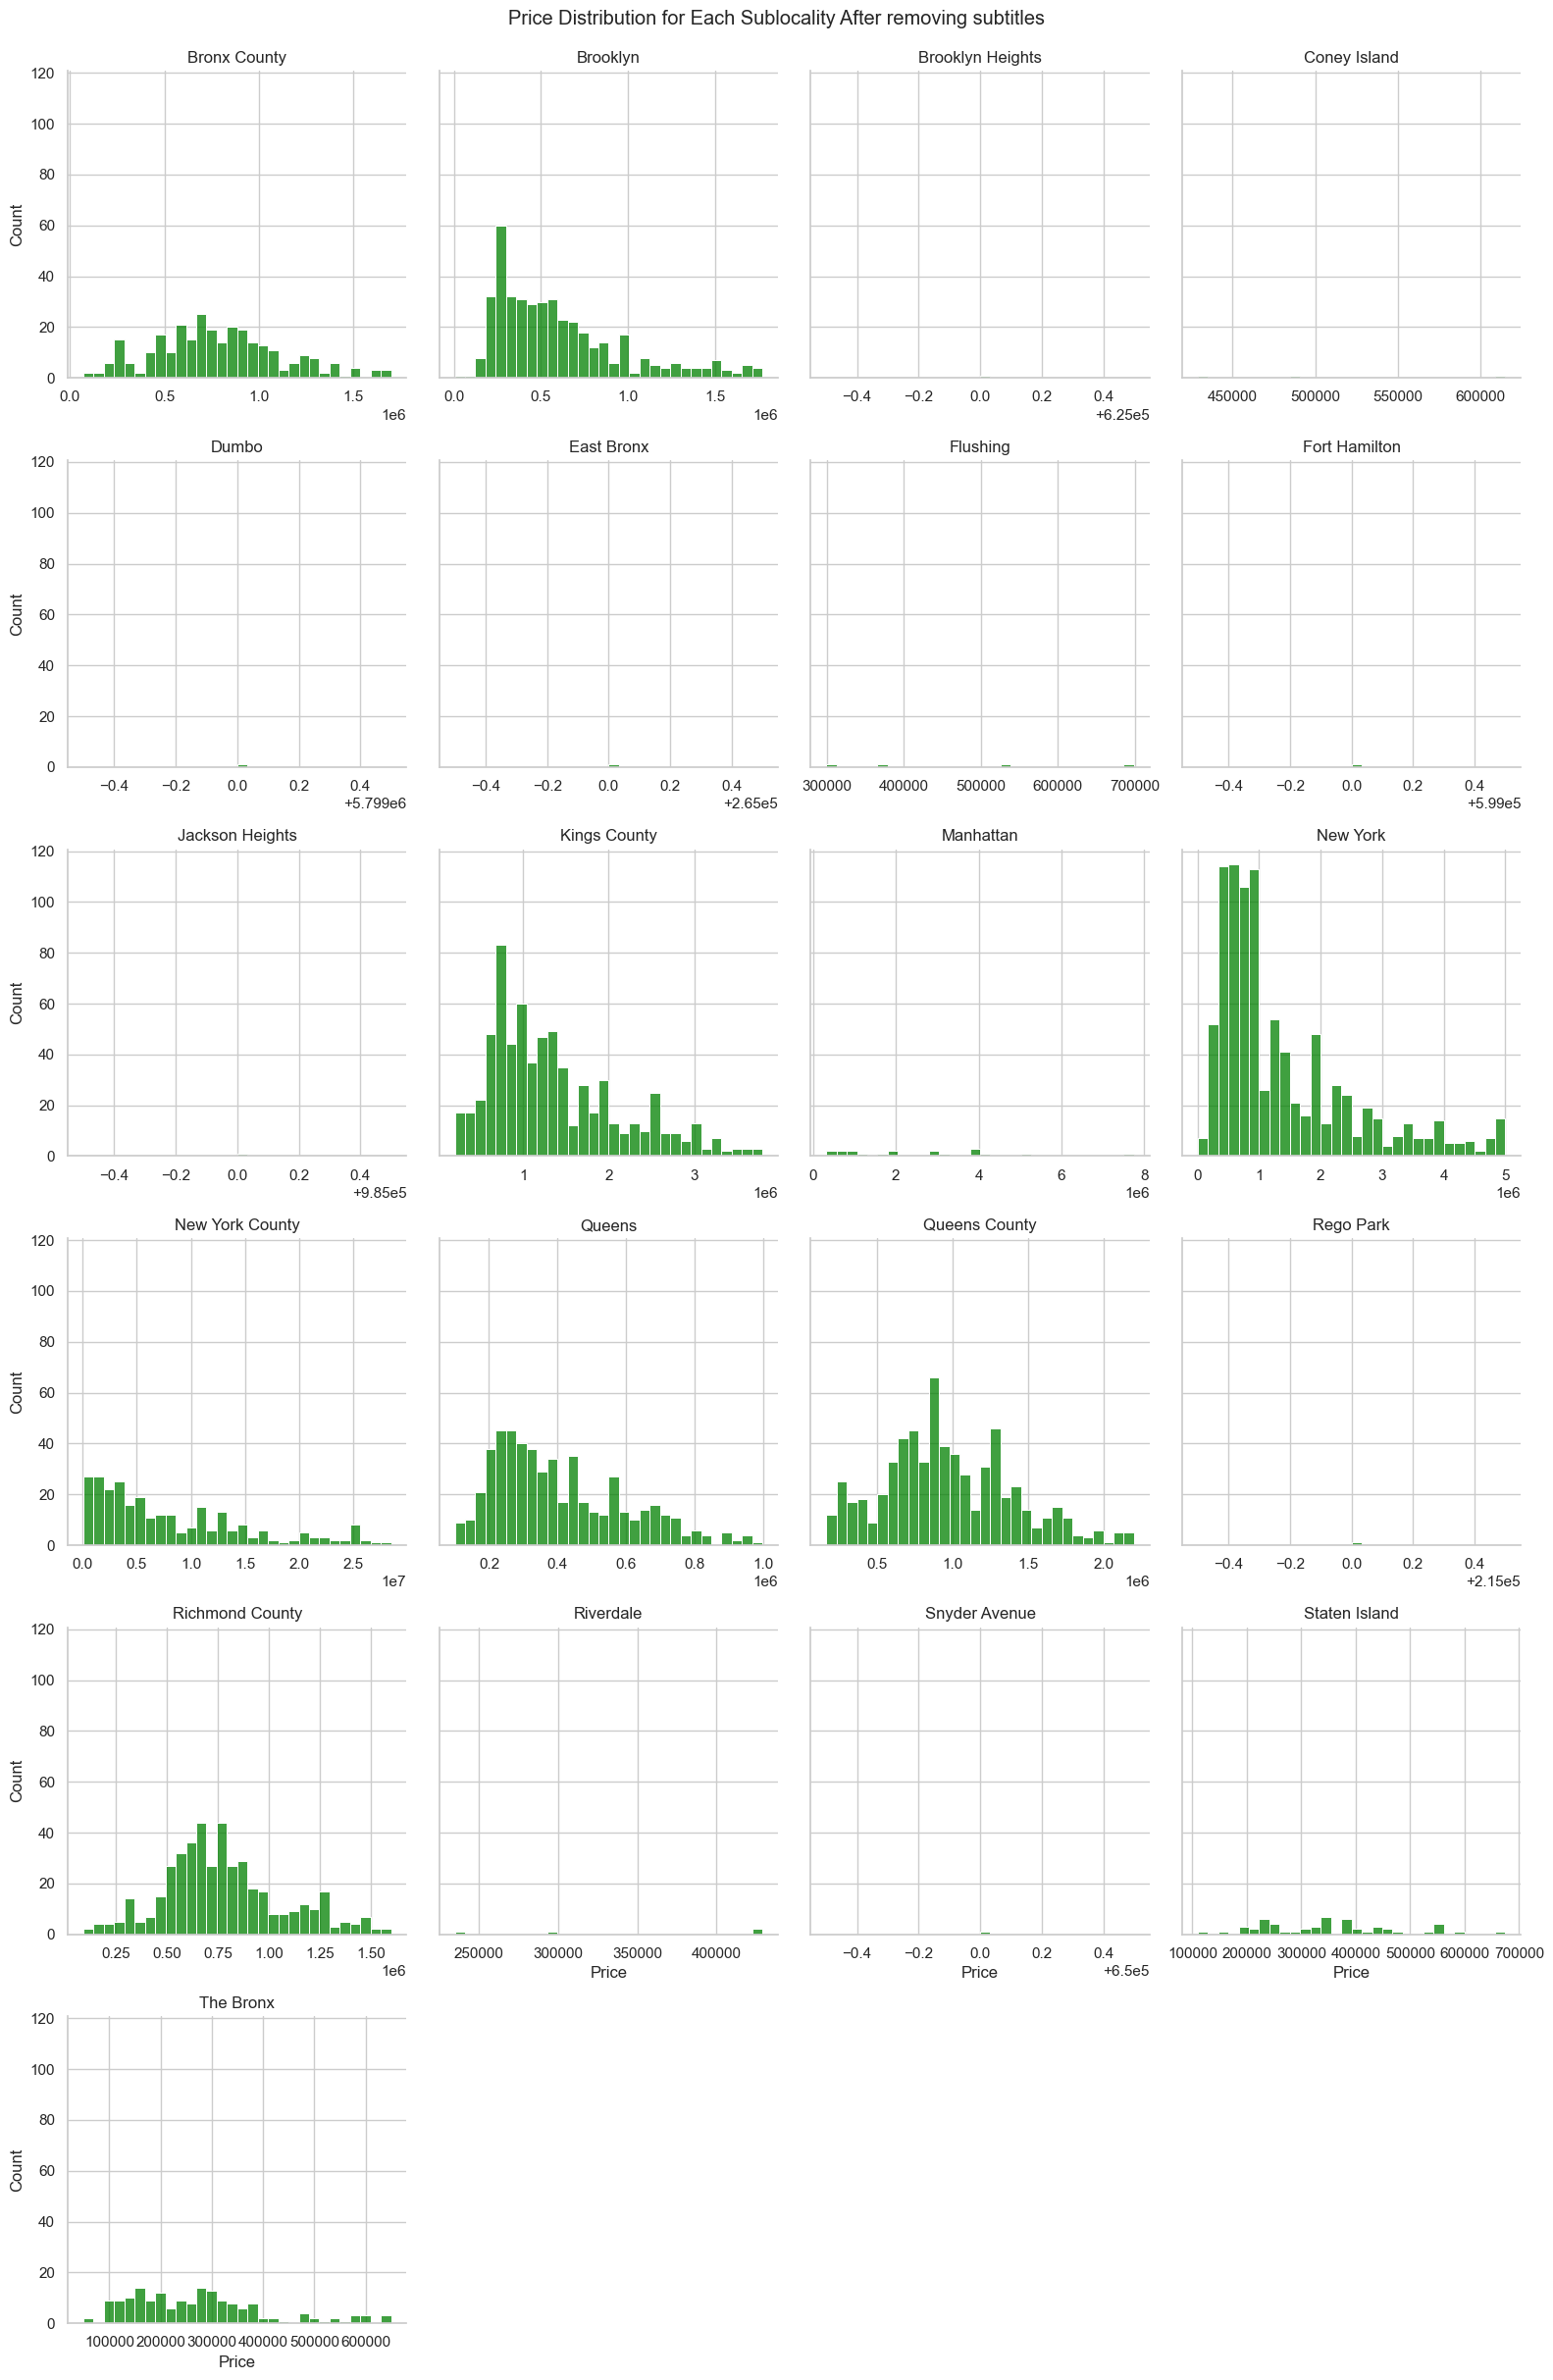

In [18]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 8))

# Create a FacetGrid with subplots for each sublocality
g = sns.FacetGrid(housing_clean, col="sublocality", col_wrap=4, height=4, sharex=False)

g.map(sns.histplot, "price", kde=False, bins=30, color='green')

g.set_axis_labels("Price", "Count")
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Price Distribution for Each Sublocality After removing subtitles", y = 1.01)

plt.show()

The variability in the prices by sublocality seem closer to normal now, we will proceed with these addresses.

## Checking out duplicated addresses

In [19]:
print(len(housing_clean))
print(housing_clean.address.nunique())

4444
4240


Above we recieve 4444 as the amount of rows in the cleaned dataframe, but 4240 unique addresses. Resulting in 204 duplicated addresses.

In [20]:
#Subsetting for duplicates based on address only
add_duplicates = housing_clean[housing_clean.address.duplicated()].address
add_duplicates
housing_dupl_add = housing_clean[housing_clean["address"].isin(add_duplicates)]
print(len(housing_dupl_add))

406


In [21]:
#Take the length of the unique addresses within the duplicates
len(housing_dupl_add.address.unique()) 


202

We recieve 406 addresses in the duplicated dataframe, with 202 unique values. So that should be mean that 200 are duplicated once (400 total rows, 2 per address), and two are duplicated twice (6 total rows, 3 per address). We will take the value counts of the addresses to confirm.

In [22]:
housing_dupl_add.address.value_counts()

address
2619 Shore Pkwy                        3
856 Washington Ave Apt 6C              3
200 E 94th St Apt 414                  2
5614 Netherland Ave Apt 4B             2
61-20 Grand Central Pkwy Unit B1210    2
                                      ..
79-28 68th Ave                         2
425 W 24th St Apt 1E                   2
66-36 Yellowstone Blvd Unit 23C        2
58 Roanoke St                          2
242 E 15th St Apt 1                    2
Name: count, Length: 202, dtype: int64

While we want to remove duplicated rows, we need to make sure that the duplicated addresses are full duplicates.

In [23]:
full_duplicates=housing_clean[housing_clean.duplicated(keep=False)]
full_duplicates

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
80,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
81,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,1650000,2,2.000000,1065.000000,200 E 94th St Apt 414,"New York, NY 10128","200 E 94th St Apt 414New York, NY 10128",New York,New York County,New York,Manhattan,200,"200 E 94th St APT 414, New York, NY 10128, USA",40.783355,-73.949998
113,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
114,Brokered by Sowae Corp,Multi-family home for sale,346000,5,2.000000,2184.207862,103-12 104th St,"Ozone Park, NY 11417","103-12 104th StOzone Park, NY 11417",United States,New York,Queens County,Queens,104th Street,"103-12 104th St, Jamaica, NY 11417, USA",40.683789,-73.838104
115,Brokered by Sowae Corp,House for sale,400000,4,2.000000,1980.000000,781 Sheperd Ave,"Brooklyn, NY 11208","781 Sheperd AveBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Shepherd Avenue,"781 Shepherd Ave, Brooklyn, NY 11208, USA",40.665357,-73.877087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714
4770,Brokered by Sotheby's International Realty - E...,Condo for sale,2600000,3,2.000000,1729.000000,242 E 15th St Apt 1,"New York, NY 10003","242 E 15th St Apt 1New York, NY 10003",New York,New York County,New York,Manhattan,242,"242 E 15th St APT 1, New York, NY 10003, USA",40.733031,-73.985037
4775,Brokered by EXIT REALTY PREMIER,House for sale,749000,3,2.373861,2002.000000,631 Essex St,"Brooklyn, NY 11208","631 Essex StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Essex Street,"631 Essex St, Brooklyn, NY 11208, USA",40.668173,-73.880027
4780,NoBroker,Multi-family home for sale,2000000,8,2.373861,2184.207862,2324 60th St,"Brooklyn, NY 11204","2324 60th StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,60th Street,"2324 60th St, Brooklyn, NY 11204, USA",40.614758,-73.975714


Taking the addresses of both, and finding the difference

In [24]:
address_list = set(housing_dupl_add.address.unique().tolist())
full_list = set(full_duplicates.address.unique().tolist())

not_full_dupl = address_list.symmetric_difference(full_list)

not_full_dupl_df = housing_clean[housing_clean["address"].isin(not_full_dupl)]
not_full_dupl_df

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
3914,Brokered by Ny Superior Realty,Multi-family home for sale,1548000,9,4.000000,4539.000000,104-14 37th Ave,"Corona, NY 11368","104-14 37th AveCorona, NY 11368",United States,New York,Queens County,Queens,37th Avenue,"104-14 37th Ave, Flushing, NY 11368, USA",40.753419,-73.862881
3989,Brokered by Ny Superior Realty,House for sale,1548000,9,4.000000,2184.207862,104-14 37th Ave,"Corona, NY 11368","104-14 37th AveCorona, NY 11368",United States,New York,Queens County,Queens,37th Avenue,"104-14 37th Ave, Flushing, NY 11368, USA",40.753419,-73.862881
4204,"Brokered by Nest Seekers International, Westside",House for sale,3200000,6,5.000000,5000.000000,18 W 127th St,"New York, NY 10027","18 W 127th StNew York, NY 10027",United States,New York,New York County,New York,West 127th Street,"18 W 127th St, New York, NY 10027, USA",40.807940,-73.942354
4759,Brokered by R New York,Multi-family home for sale,2500000,3,2.373861,4100.000000,18 W 127th St,"New York, NY 10027","18 W 127th StNew York, NY 10027",United States,New York,New York County,New York,West 127th Street,"18 W 127th St, New York, NY 10027, USA",40.807940,-73.942354


We have two addresses that have duplicated addressed, but mismatched information. It seems as though the second entry for each property is an error as the values are unusual. We will keep the first entry for each.

In [25]:
print(len(housing_clean)) #Should be 4444
clean_df = housing_clean.drop_duplicates(subset = ["address"], keep = "first") #Since we are keeping the first instance, we will get the correct non-fully duplicated rows
print(len(clean_df)) #should be  4240 (losing 200 rows from 1x duplicates, and 4 rows from 2x duplicates (204 deleted))
print(clean_df.address.value_counts()[clean_df.address.value_counts()>1]) #making sure there are no more duplicated rows

4444
4240
Series([], Name: count, dtype: int64)


In [26]:
#Now check that the correct non-full duplicates were kept
not_full_list = not_full_dupl_df.address.unique().tolist()
clean_df[clean_df.address.isin(not_full_list)]
#it kept the correct rows. We now have our cleaned dataframe

,brokertitle,type,price,beds,bath,propertysqft,address,state,main_address,administrative_area_level_2,locality,sublocality,street_name,long_name,formatted_address,latitude,longitude
3914,Brokered by Ny Superior Realty,Multi-family home for sale,1548000,9,4.0,4539.0,104-14 37th Ave,"Corona, NY 11368","104-14 37th AveCorona, NY 11368",United States,New York,Queens County,Queens,37th Avenue,"104-14 37th Ave, Flushing, NY 11368, USA",40.753419,-73.862881
4204,"Brokered by Nest Seekers International, Westside",House for sale,3200000,6,5.0,5000.0,18 W 127th St,"New York, NY 10027","18 W 127th StNew York, NY 10027",United States,New York,New York County,New York,West 127th Street,"18 W 127th St, New York, NY 10027, USA",40.807940,-73.942354


## Exploring Data for Analysis

In [27]:
clean_df.columns

Index(['brokertitle', 'type', 'price', 'beds', 'bath', 'propertysqft',
       'address', 'state', 'main_address', 'administrative_area_level_2',
       'locality', 'sublocality', 'street_name', 'long_name',
       'formatted_address', 'latitude', 'longitude'],
      dtype='object')

In [28]:
selected_features = ['brokertitle','address','type', 'beds', 'bath', 'propertysqft', 'sublocality', 'price', 'latitude','longitude']
df = clean_df[selected_features]

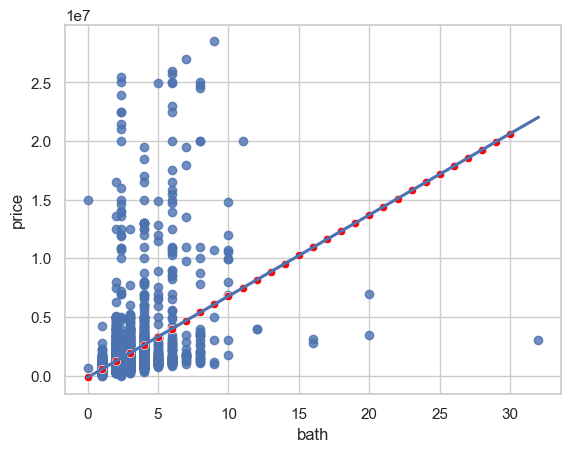

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     960.5
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          2.89e-190
Time:                        14:51:26   Log-Likelihood:                -68045.
No. Observations:                4240   AIC:                         1.361e+05
Df Residuals:                    4238   BIC:                         1.361e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.58e+05   6.05e+04     -2.610      0.009   -2.77e+05   -3.93e+04
bath        6.935e+05   2.24e+04     30.992      0.000     6.5e+05    7.37e+05
==============================================================================
Omnibus:                     4662.647   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           390404.987
Skew:                           5.616   Prob(JB):                         0.00
Kurtosis:                      48.648   Cond. No.                         5.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
bath_v_price = ols("price~bath", data = df).fit()
baths = pd.DataFrame({'bath': np.arange(0, 31)})
bath_pred = bath_v_price.predict(baths)

pred_data = baths.assign(price= bath_pred)

fig = plt.figure()
sns.regplot(data = df,
           x="bath",
           y="price",
           ci=None)
sns.scatterplot(data = pred_data,
           x="bath",
           y="price",
           color = 'red')

plt.show()

bath_v_price.summary()

In [30]:
#parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
#searcher = GridSearchCV(model, parameters)

#print("Best CV params", searcher.best_params_)
#print("Best CV accuracy", searcher.best_score_)
      

In [31]:
fig = px.scatter_geo(df, lat='latitude', lon='longitude', color='price',
                     hover_name='address', #size='mag',
                     title='Real Estate Prices in NYC')
fig.update_geos(fitbounds="locations")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Modelling the Data

In [ ]:
model_features = ['brokertitle','type', 'beds', 'bath', 'propertysqft', 'sublocality', 'price']
df_model = df[model_features]
df_model

,brokertitle,type,beds,bath,propertysqft,sublocality,price
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.000000,Manhattan,315000
2,Brokered by Sowae Corp,House for sale,4,2.0,2015.000000,Richmond County,260000
3,Brokered by COMPASS,Condo for sale,3,1.0,445.000000,New York County,69000
5,Brokered by Sowae Corp,House for sale,5,2.0,4004.000000,Kings County,690000
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,2,2.0,2184.207862,New York,899500
...,...,...,...,...,...,...,...
4796,Brokered by COMPASS,Co-op for sale,1,1.0,2184.207862,New York,599000
4797,Brokered by Mjr Real Estate Llc,Co-op for sale,1,1.0,2184.207862,Queens County,245000
4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1,1.0,2184.207862,New York County,1275000
4799,Brokered by E Realty International Corp,Condo for sale,2,1.0,655.000000,Queens,598125


In [ ]:
#Checking the data types
df_model.dtypes

brokertitle       object
type              object
beds               int64
bath             float64
propertysqft     float64
sublocality     category
price              int64
dtype: object

In [ ]:
#Fixing data types
df_model.loc[:,['brokertitle', 'type']] = df_model.loc[:,['brokertitle', 'type']].astype("category")
df_model.dtypes



brokertitle       object
type              object
beds               int64
bath             float64
propertysqft     float64
sublocality     category
price              int64
dtype: object

In [ ]:
X= df[["beds","bath","propertysqft","sublocality"]]
print(X)


      beds  bath  propertysqft      sublocality
0        2   2.0   1400.000000        Manhattan
2        4   2.0   2015.000000  Richmond County
3        3   1.0    445.000000  New York County
5        5   2.0   4004.000000     Kings County
6        2   2.0   2184.207862         New York
...    ...   ...           ...              ...
4796     1   1.0   2184.207862         New York
4797     1   1.0   2184.207862    Queens County
4798     1   1.0   2184.207862  New York County
4799     2   1.0    655.000000           Queens
4800     1   1.0    750.000000         Brooklyn

[4240 rows x 4 columns]


In [ ]:
y = df["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [ ]:
n_estimators = np.arange(5,21,1)

estimator_r2 = {}
for est in n_estimators:
    xg_cl = xgb.XGBRegressor(objective = "reg:squarederror",
                             n_estimators=est,
                             seed = 123, 
                             enable_categorical=True)
    xg_cl.fit(X_train,y_train)
    pred_price = xg_cl.predict(X_test)
    mse = mean_squared_error(y_test, pred_price)
    rmse = np.sqrt(mse)
    r_squared = r2_score(y_test, pred_price)
    estimator_r2[est] = [mse, rmse, r_squared]

estimator_df = pd.DataFrame.from_dict(estimator_r2, orient='index', columns=["MSE", "RMSE", "R-squared"])
estimator_df


,MSE,RMSE,R-squared
5,2.482520e+12,1.575601e+06,0.624633
6,2.308723e+12,1.519448e+06,0.650912
7,2.267028e+12,1.505665e+06,0.657216
8,2.214678e+12,1.488179e+06,0.665132
9,2.183816e+12,1.477774e+06,0.669798
10,2.191712e+12,1.480443e+06,0.668604
11,2.156272e+12,1.468425e+06,0.673963
12,2.162329e+12,1.470486e+06,0.673047
13,2.142951e+12,1.463882e+06,0.675977
14,2.151354e+12,1.466750e+06,0.674707


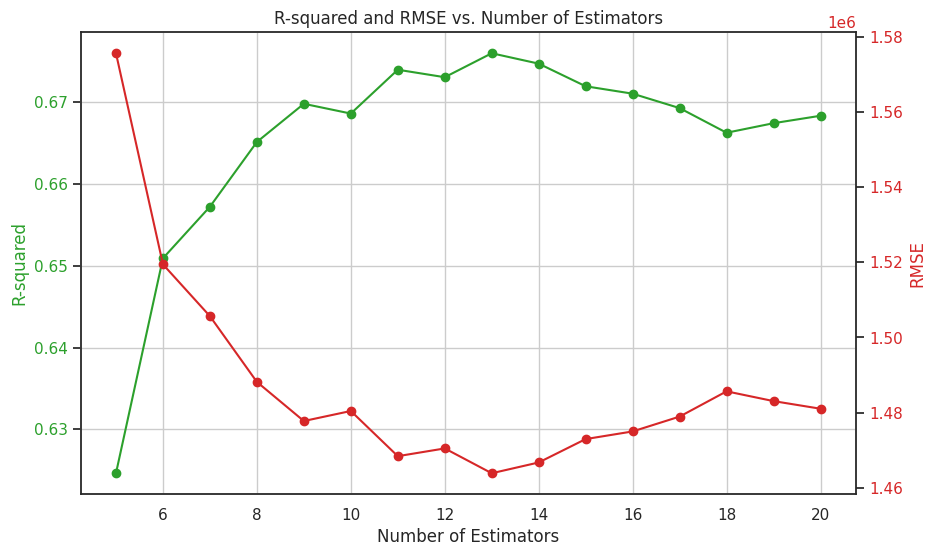

In [ ]:
fix, ax1 = plt.subplots(figsize = (10,6))
sns.set(style='white')

ax1.set_xlabel('Number of Estimators')
ax1.set_ylabel('R-squared', color="tab:green")
ax1.plot(estimator_df.index, estimator_df['R-squared'], color='tab:green')
ax1.scatter(estimator_df.index, estimator_df['R-squared'], color='tab:green')
ax1.tick_params(axis='y', labelcolor='tab:green')

# Secondary y-axis for RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='tab:red')
ax2.plot(estimator_df.index, estimator_df['RMSE'], color='tab:red')
ax2.scatter(estimator_df.index, estimator_df['RMSE'], color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('R-squared and RMSE vs. Number of Estimators')
plt.show()

The best fit for this model seems to be with n_estimators = 13.

In [ ]:
params_grid = {'max_depth':[3,5,8, 12],
              "learning_rate":[0.01,0.1,0.3],
              'lambda': [1, 10, 50, 100], 
              'alpha':[1, 10, 50, 100]} 

xg_grid = xgb.XGBRegressor(objective = "reg:squarederror", 
                           booster = 'dart',
                           n_estimators = 13, 
                           seed = 123, 
                           enable_categorical=True)

grid_search = GridSearchCV(xg_grid, 
                           params_grid, 
                           cv = 3, 
                           scoring = "neg_mean_squared_error", 
                           verbose = 1)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Negative Mean Squared Error: ", grid_search.best_score_)

xg_model = grid_search.best_estimator_

Fitting 3 folds for each of 192 candidates, totalling 576 fits
Best Parameters:  {'alpha': 10, 'lambda': 10, 'learning_rate': 0.3, 'max_depth': 5}
Best Negative Mean Squared Error:  -2023979364418.866


In [ ]:
pred_price = xg_model.predict(X_test)
mse = mean_squared_error(y_test, pred_price)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, pred_price)

print(f"Using these parameters, we recieve: \n\n MSE = {mse:.2f} \n RMSE = {rmse:.2f}\n r-squared = {r_squared:.3f}")

Using these parameters, we recieve: 

 MSE = 2631965733407.87 
 RMSE = 1622333.42
 r-squared = 0.602


After spending a lot of time running the Grid Search with different hyperparameter options, this model seems to have the best fit onto the data. R^2 = 0.693 was the highest value receieved. DART was used over gbtree in order to prevent overfitting.

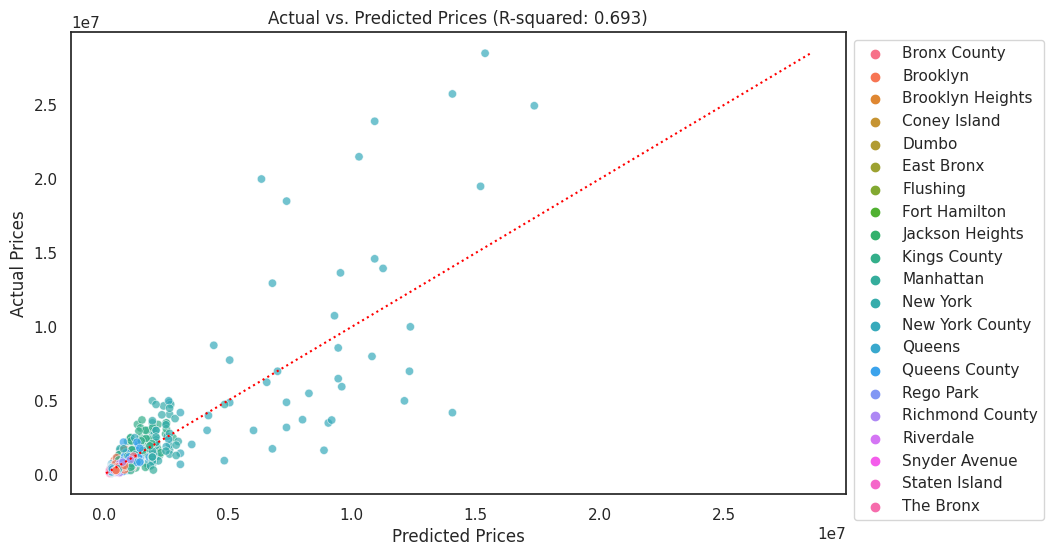

In [ ]:
plot_data = pd.DataFrame({"pred_price":pred_price,"y_test":y_test,"sublocality":X_test['sublocality']})

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = plot_data, x="pred_price", y="y_test",hue = "sublocality", alpha=0.7)
plt.title(f'Actual vs. Predicted Prices (R-squared: {r_squared:.3f})')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle=":")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

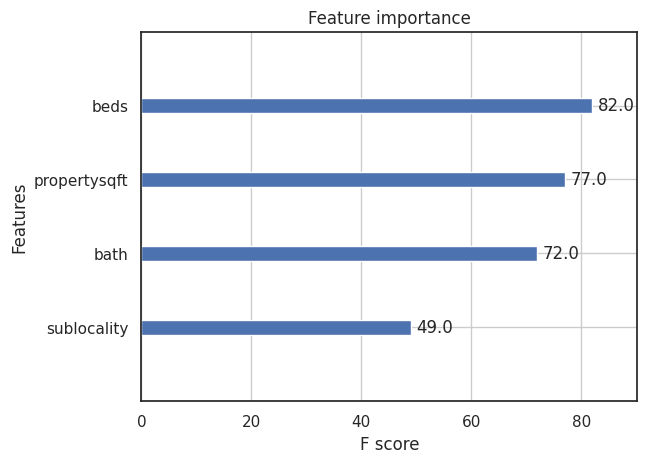

In [ ]:
xgb.plot_importance(xg_model)
plt.show()

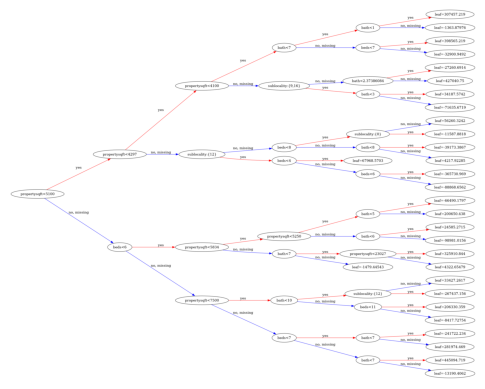

In [ ]:
xgb.plot_tree(xg_model, num_trees = 12, rankdir="LR")
plt.show()

## Now let's do it the other way around

### Switch Price into explanatory var, Sublocality into response var

In [ ]:
df.sublocality.value_counts()

sublocality
New York            867
Kings County        642
Queens County       610
Queens              513
Richmond County     428
Brooklyn            405
Bronx County        271
New York County     256
The Bronx           160
Staten Island        52
Manhattan            19
Flushing              4
Coney Island          3
Riverdale             3
Jackson Heights       1
Fort Hamilton         1
East Bronx            1
Dumbo                 1
Rego Park             1
Brooklyn Heights      1
Snyder Avenue         1
Name: count, dtype: int64

There are a lot of sublocalities with only a few entries. We'll subset for only sublocalities that have at least 50 entries.

In [ ]:
df_subset = df[df["sublocality"].map(df["sublocality"].value_counts() > 50)]
df_subset.loc[:,"sublocality"] = df_subset.loc[:,"sublocality"].cat.remove_unused_categories()
df_subset.sublocality.value_counts()

sublocality
New York           867
Kings County       642
Queens County      610
Queens             513
Richmond County    428
Brooklyn           405
Bronx County       271
New York County    256
The Bronx          160
Staten Island       52
Name: count, dtype: int64

In [ ]:
scaler = StandardScaler()
X= df_subset[["beds","bath","propertysqft","price"]]
label = LabelEncoder()
y = label.fit_transform(df_subset['sublocality'])

#### Pre-Processing the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

#X_train = scaler.fit_transform(X_train_unscaled)
#X_test = scaler.fit_transform(X_test_unscaled)
#Scaled data performed worse than the unprocessed data

Decide on the best model type for this data

In [ ]:
models = [KNeighborsClassifier(),LogisticRegression(multi_class='multinomial'),
          RandomForestClassifier(),BaggingClassifier(),
          SVC(), xgb.XGBClassifier()]

#List of the model values
Name = []
Accuracy = []
Precision = []
Recall = []
Time_Taken = []

#run each argument on the data
for model in models:
    Name.append(type(model).__name__)
    
    begin = time.time()
    
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    
    end = time.time()
    
    accuracyScore = accuracy_score(prediction,y_test)
    Accuracy.append(accuracyScore)
    precisionScore = precision_score(prediction,y_test, average = 'weighted')
    Precision.append(precisionScore)
    recallScore = recall_score(prediction,y_test, average = 'weighted')
    Recall.append(recallScore)
    Time_Taken.append(end-begin)
    

Dict = {'Name':Name,'Accuracy':Accuracy,'Recall':Recall,'Precision':Precision,'Time Taken':Time_Taken}

model_df = pd.DataFrame(Dict).sort_values("Accuracy",ascending = False)
model_df

NameError: name 'KNeighborsClassifier' is not defined

While all models perform poorly, we will keep going with XGB as it performed best. Tuning hyperparameters may help this model.

In [ ]:
params_grid = {'max_depth': [6, 8, 10],
    'learning_rate': [0.01,0.001],
    'lambda': [5, 8, 10],
    'alpha': [3,5, 8],
    "n_estimators":[13, 15]}


xg_grid = xgb.XGBClassifier(objective='multi:softmax',  
    num_class=len(set(y_train)),  
    booster='dart',
    seed=123,
    enable_categorical=True)

grid_search = GridSearchCV(xg_grid,
    params_grid,
    cv=3,
    scoring="accuracy",
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# Best Model
xg_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters:  {'alpha': 3, 'lambda': 5, 'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 13}
Best Accuracy:  0.4846862920011894


<Axes: xlabel='Actual', ylabel='Prediction'>

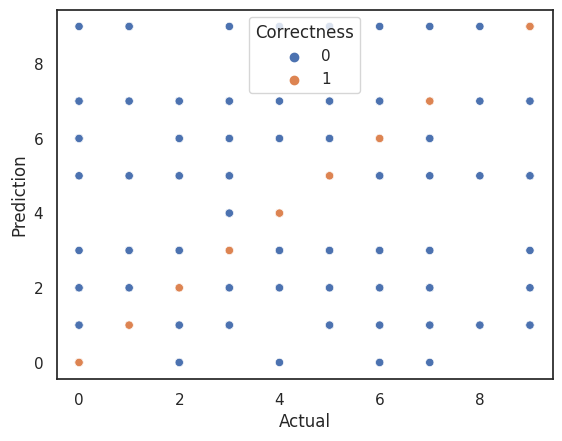

In [ ]:
y_pred = xg_model.predict(X_test)

class_df = pd.DataFrame({"Prediction":y_pred, "Actual":y_test})
class_df["Correctness"] = np.where(class_df["Prediction"] == class_df["Actual"], 1, 0)

sns.scatterplot(data = class_df,
               x= "Actual",
               y= "Prediction",
               hue= "Correctness")

In [ ]:
#Get perclass acc.

NameError: name 'optimize_and_plot' is not defined